In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = '/home/ikharitonov/Desktop/sleap_training/second_ellipse.003_20204321_343_5.analysis.csv'
df = pd.read_csv(path)
df

,track,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,NaN,0,NaN,30.098503,183.755737,NaN,135.012780,156.221634,NaN,269.288632,...,NaN,100.120031,188.017810,NaN,168.908319,123.859011,NaN,165.710764,189.323207,NaN
1,NaN,1,10.299853,29.928240,183.859467,0.906243,135.843323,156.039566,0.940850,270.218414,...,0.927483,101.874626,188.069046,0.924287,169.743134,124.028069,0.940773,167.756516,189.751663,0.902475
2,NaN,2,10.309512,29.864458,182.192261,0.885018,134.164429,156.009537,0.945554,271.867157,...,0.947799,100.180702,188.222885,0.960958,169.816925,123.965485,0.933206,167.715759,189.825195,0.883926
3,NaN,3,10.257852,29.822008,182.182114,0.881487,134.090759,156.008041,0.948546,271.752930,...,0.945182,100.114777,188.138855,0.955913,169.757278,123.968246,0.908748,168.040726,188.063324,0.953332
4,NaN,4,10.400537,29.853571,182.212814,0.875701,134.118958,155.955917,0.959233,271.813385,...,0.955354,100.022308,187.938156,0.971927,169.851013,123.924416,0.951482,168.148407,188.126663,0.892221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27838,NaN,27858,10.211238,32.080292,183.936462,0.913815,138.144318,162.170609,0.930936,272.095764,...,0.963983,128.212296,171.903412,0.841206,148.302811,152.153030,1.036520,148.014328,172.209427,0.954158
27839,NaN,27859,10.174915,32.060841,183.755219,0.903187,138.091232,162.178085,0.929457,272.132812,...,0.962262,128.228607,171.874573,0.835356,148.203110,152.207077,1.039286,147.910248,172.177383,0.967416
27840,NaN,27860,10.154961,32.028248,183.805023,0.925700,138.192947,162.201752,0.929702,272.211884,...,0.968969,128.317841,171.919479,0.839643,148.304581,152.245300,1.021459,148.010880,172.214355,0.975907
27841,NaN,27861,10.093005,32.011517,183.807724,0.943651,138.201584,162.166412,0.923574,272.136932,...,0.972047,129.711578,171.901993,0.842626,149.787750,152.162689,1.029769,148.099594,172.169250,0.962196


In [4]:
df.columns

Index(['track', 'frame_idx', 'instance.score', 'left.x', 'left.y',
       'left.score', 'center.x', 'center.y', 'center.score', 'right.x',
       'right.y', 'right.score', 'p1.x', 'p1.y', 'p1.score', 'p5.x', 'p5.y',
       'p5.score', 'p3.x', 'p3.y', 'p3.score', 'p7.x', 'p7.y', 'p7.score',
       'p2.x', 'p2.y', 'p2.score', 'p8.x', 'p8.y', 'p8.score', 'p4.x', 'p4.y',
       'p4.score', 'p6.x', 'p6.y', 'p6.score'],
      dtype='object')

In [5]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
active_points = ['center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
active_points_x = ['center.x','p1.x','p2.x','p3.x','p4.x','p5.x','p6.x','p7.x','p8.x']
active_points_y = ['center.y','p1.y','p2.y','p3.y','p4.y','p5.y','p6.y','p7.y','p8.y']

## Processing data

In [6]:
coordinates_dict = {key:df[key].to_numpy() for key in columns_of_interest}

In [7]:
displacements_dict = {k:np.diff(v) for k, v in coordinates_dict.items()} # in [displacement] = [pixels / frame]

In [8]:
displacements_dict

{'left.x': array([-0.17026329, -0.06378174, -0.04244995, ..., -0.03259277,
        -0.01673126, -0.01097488]),
 'left.y': array([ 0.10372925, -1.66720581, -0.01014709, ...,  0.04980469,
         0.00270081, -0.03517151]),
 'center.x': array([ 0.83054293, -1.67889404, -0.07366943, ...,  0.10171509,
         0.00863647,  0.01040649]),
 'center.y': array([-0.18206766, -0.0300293 , -0.00149536, ...,  0.02366638,
        -0.03533936,  0.02444458]),
 'right.x': array([ 0.9297827 ,  1.64874268, -0.11422729, ...,  0.07907104,
        -0.07495117,  0.02716064]),
 'right.y': array([ 0.1524123 ,  0.13650513, -0.08070374, ...,  0.08476257,
         0.00149536,  0.10340881]),
 'p1.x': array([-0.10958221, -0.1585083 , -0.10050964, ...,  0.07823944,
        -0.06075287,  0.02996826]),
 'p1.y': array([-0.08263065,  1.76931763, -0.18502808, ...,  0.02200317,
        -0.02868652,  0.01107788]),
 'p2.x': array([-0.60518889, -0.0932312 , -1.57774353, ...,  0.09025574,
        -0.05848694,  0.06071472]),
 

In [9]:
# Calculating mean displacement between left and right reference points (horizontal and vertical components separately)
mean_reference_x = np.stack((displacements_dict['left.x'], displacements_dict['right.x'])).mean(axis=0)
mean_reference_y = np.stack((displacements_dict['left.y'], displacements_dict['right.y'])).mean(axis=0)
mean_reference_x.shape

(27842,)

In [10]:
# Subtracting the displacement of the reference points at each frame
reference_subtraced_displacements_dict = {k:displacements_dict[k]-mean_reference_x for k in active_points_x} | {k:displacements_dict[k]-mean_reference_y for k in active_points_y} # joining the horizontal and vertical dictionaries into one

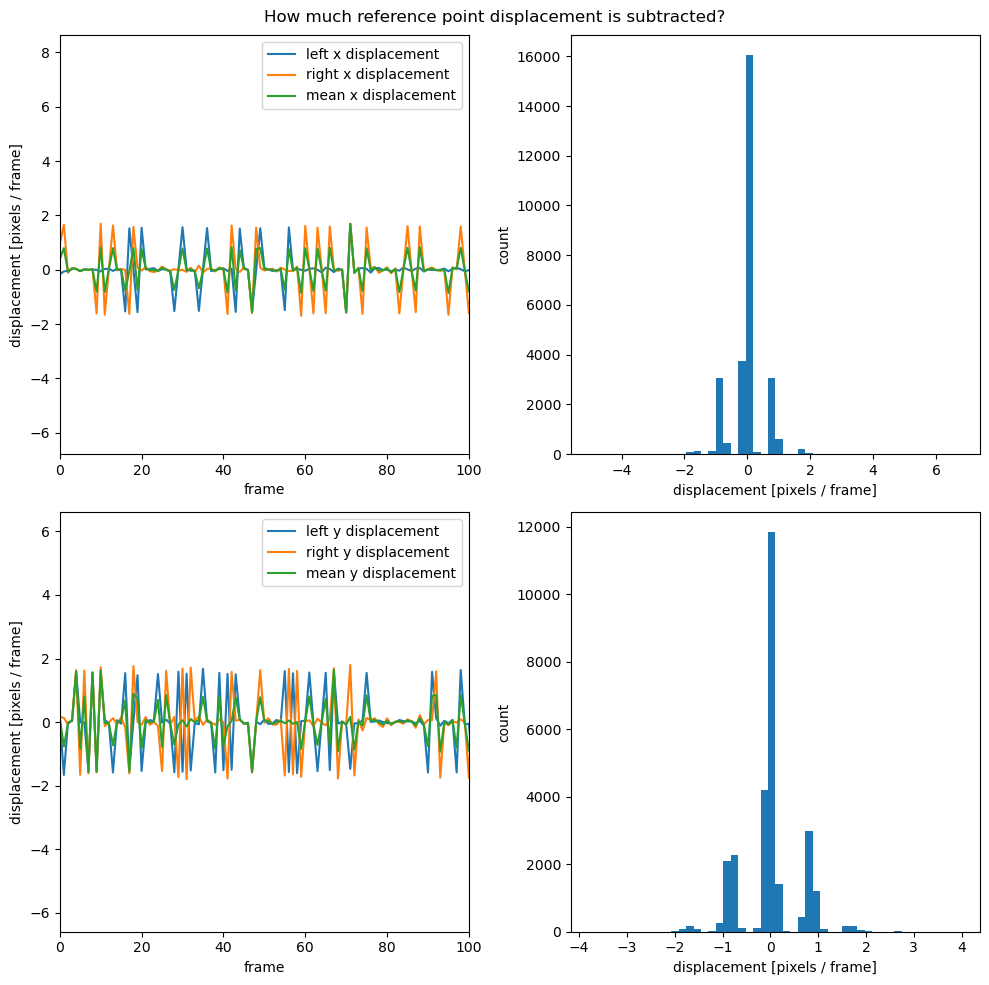

In [12]:
# Info plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('How much reference point displacement is subtracted?')

ax[0][0].plot(displacements_dict['left.x'])
ax[0][0].plot(displacements_dict['right.x'])
ax[0][0].plot(mean_reference_x)
ax[0][0].set_xlim([0,100])
ax[0][0].legend(['left x displacement', 'right x displacement', 'mean x displacement'])
ax[0][0].set_xlabel('frame')
ax[0][0].set_ylabel('displacement [pixels / frame]')

ax[0][1].hist(mean_reference_x, bins=50)
ax[0][1].set_xlabel('displacement [pixels / frame]')
ax[0][1].set_ylabel('count')



ax[1][0].plot(displacements_dict['left.y'])
ax[1][0].plot(displacements_dict['right.y'])
ax[1][0].plot(mean_reference_y)
ax[1][0].set_xlim([0,100])
ax[1][0].legend(['left y displacement', 'right y displacement', 'mean y displacement'])
ax[1][0].set_xlabel('frame')
ax[1][0].set_ylabel('displacement [pixels / frame]')

ax[1][1].hist(mean_reference_y, bins=50)
ax[1][1].set_xlabel('displacement [pixels / frame]')
ax[1][1].set_ylabel('count')

plt.tight_layout()
plt.show()

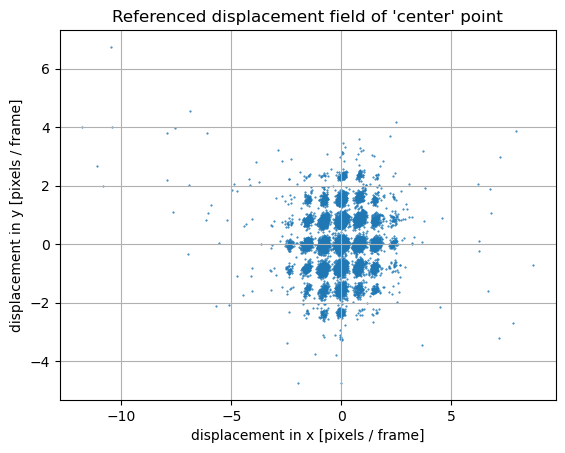

In [67]:
point = 'center'
plt.figure()
plt.title(f"Referenced displacement field of '{point}' point")
plt.scatter(reference_subtraced_displacements_dict[f'{point}.x'], reference_subtraced_displacements_dict[f'{point}.y'], s=0.25)
plt.xlabel('displacement in x [pixels / frame]')
plt.ylabel('displacement in y [pixels / frame]')
plt.grid()
plt.show()

In [48]:
def recalculated_coordinates(point_name):
    # Recalculates coordinates of a point at each frame, applying the referenced displacements to the coordinates of the very first frame.
    out_array = np.zeros(reference_subtraced_displacements_dict[point_name].shape[0]+1)
    out_array[0] = df[point_name].to_numpy()[0]
    for i, disp in enumerate(reference_subtraced_displacements_dict[point_name]):
        out_array[i+1] = out_array[i] + disp
        
    return out_array

reference_subtraced_coordinates_dict = {p:recalculated_coordinates(p) for p in active_points_x + active_points_y}

In [49]:
reference_subtraced_coordinates_dict

{'center.x': array([135.01277982, 135.46356305, 132.99218854, ..., 135.76644906,
        135.82092675, 135.82324036]),
 'p1.x': array([ 90.10112884,  89.61178693,  88.66079816, ..., 123.71067055,
        123.6957589 , 123.71763428]),
 'p2.x': array([102.48558288, 101.50063428, 100.61492261, ..., 127.63806161,
        127.62541588, 127.67803773]),
 'p3.x': array([134.73557834, 133.82324322, 133.03120526, ..., 135.82101449,
        135.88283166, 135.91346558]),
 'p4.x': array([168.90831856, 169.36337384, 168.64468487, ..., 145.87808236,
        147.40709313, 147.41015443]),
 'p5.x': array([180.69359622, 181.41317853, 180.74270734, ..., 149.740738  ,
        149.83917626, 149.82211121]),
 'p6.x': array([165.71076412, 167.3767558 , 166.5435191 , ..., 145.58438119,
        145.718937  , 145.62995728]),
 'p7.x': array([134.68638843, 135.53137311, 132.89761456, ..., 135.54547127,
        135.71136864, 135.58149537]),
 'p8.x': array([100.12003138, 101.49486645,  99.00846204, ..., 125.89134225,

## Plotting

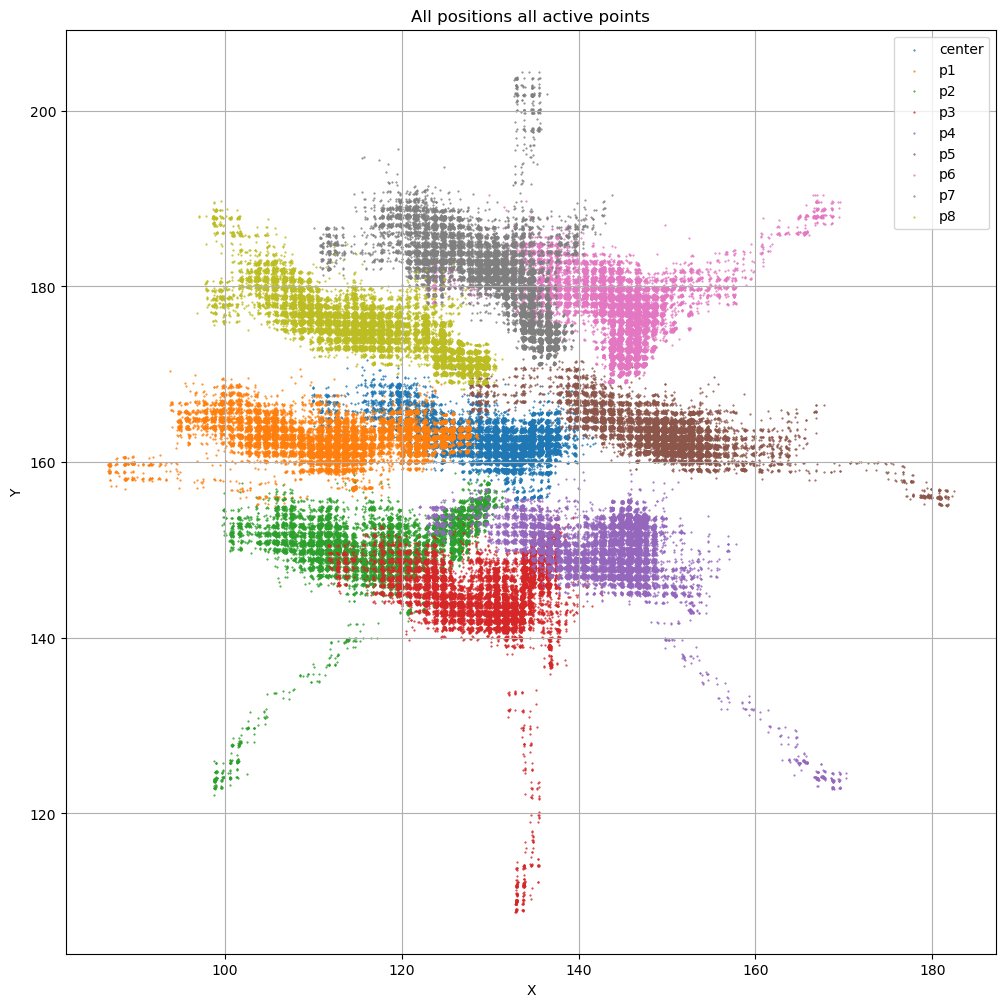

In [66]:
plt.figure(figsize=(12,12))
plt.title("All positions all active points")
for point in active_points:
    plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(active_points)
plt.grid()
plt.show()

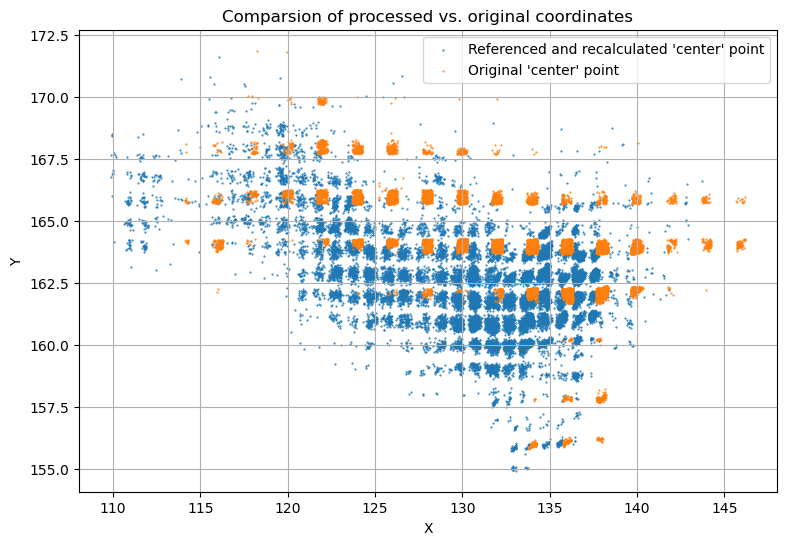

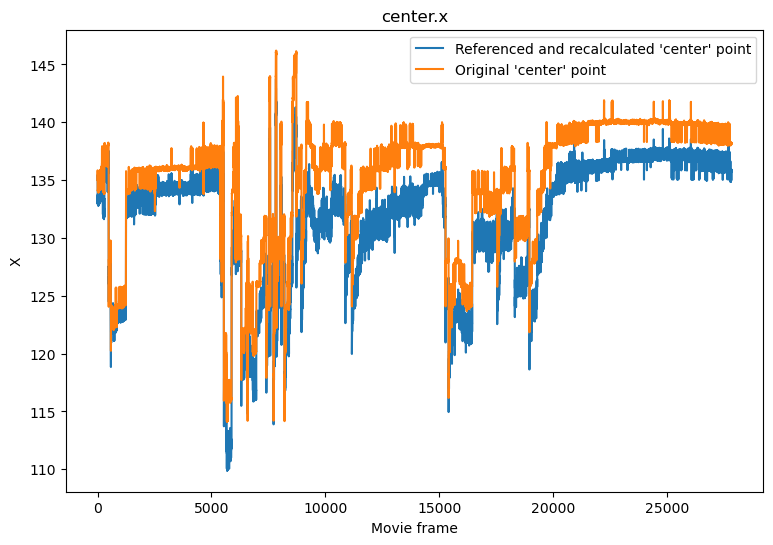

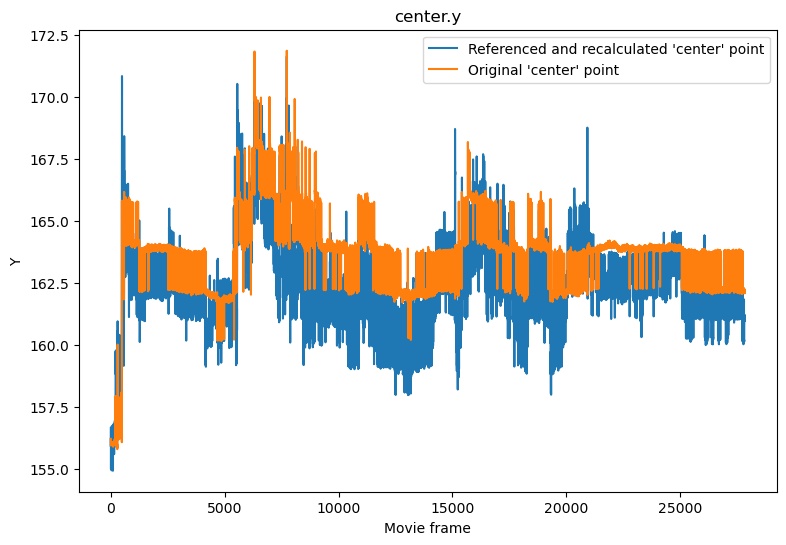

In [70]:
point = 'center'

plt.figure(figsize=(9,6))
plt.title('Comparsion of processed vs. original coordinates')
plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)
plt.scatter(df[f'{point}.x'], df[f'{point}.y'], s=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f"Original '{point}' point"])
plt.grid()
plt.show()

plt.figure(figsize=(9,6))
plt.title(f'{point}.x')
plt.plot(reference_subtraced_coordinates_dict[f'{point}.x'])
plt.plot(df[f'{point}.x'])
plt.xlabel('Movie frame')
plt.ylabel('X')
plt.legend([f"Referenced and recalculated '{point}' point", f"Original '{point}' point"])
plt.show()

plt.figure(figsize=(9,6))
plt.title(f'{point}.y')
plt.plot(reference_subtraced_coordinates_dict[f'{point}.y'])
plt.plot(df[f'{point}.y'])
plt.xlabel('Movie frame')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f"Original '{point}' point"])
plt.show()

## Finding a horizontal axis

In [76]:
point = 'center'

line_fn = np.polyfit(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], 1)
line_fn = np.poly1d(line_fn)

In [101]:
print(f'Found a linear fit with slope {line_fn[1]} and y-intercept {line_fn[0]}')

Found a linear fit with slope -0.134928003735621 and y-intercept 180.20773876352058


In [ ]:
"{:.2f}".format(line_fn[1])

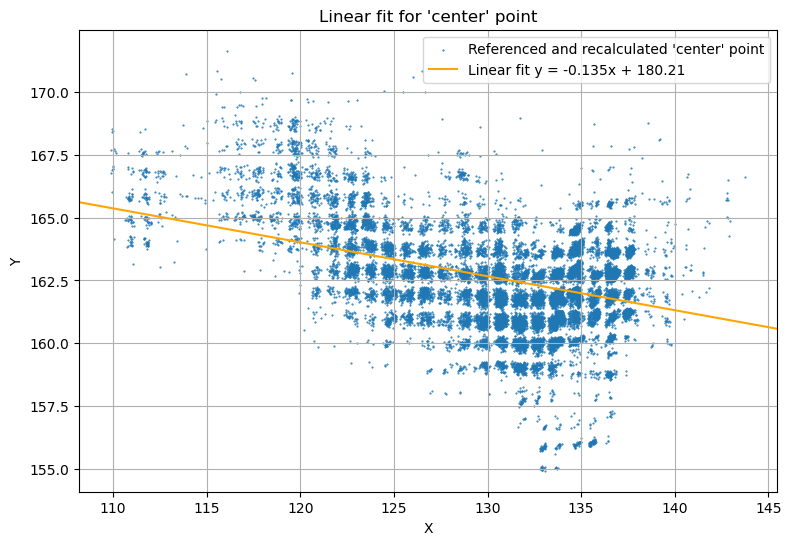

In [106]:
plt.figure(figsize=(9,6))
plt.title(f"Linear fit for '{point}' point")
plt.scatter(reference_subtraced_coordinates_dict[f'{point}.x'], reference_subtraced_coordinates_dict[f'{point}.y'], s=0.25)

current_xlim, current_ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot(current_xlim, line_fn(current_xlim), c='orange')
plt.xlim(current_xlim)
plt.ylim(current_ylim)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend([f"Referenced and recalculated '{point}' point", f'Linear fit y = {"{:.3f}".format(line_fn[1])}x + {"{:.2f}".format(line_fn[0])}'])
plt.grid()
plt.show()

## Alignment

In [119]:
point1 = np.array([0, line_fn(0)])
m = line_fn[1]
c = line_fn[0]
point2 = np.array([-c/m, 0])
vec = point2 - point1
vec = vec / np.linalg.norm(vec)

print(point1)
print(point2)
print(vec)

[  0.         180.20773876]
[1335.58441372    0.        ]
[ 0.99101965 -0.1337163 ]


In [132]:
test_arr = np.stack([reference_subtraced_displacements_dict[f'{point}.x'], reference_subtraced_displacements_dict[f'{point}.y']])
test_arr[:,10]

array([-0.89457607, -1.5941925 ])

In [135]:
np.dot(test_arr[:,10], vec) / np.linalg.norm(vec)

-0.6733729395932312